In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import IPython.display
from IPython.display import HTML
from IPython.display import Image
import base64

In [3]:
PATH = '/kaggle/input/nft-art-dataset/dataset/'

In [4]:
data = pd.read_csv(PATH + 'dataset.csv')

In [5]:
data.head()

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,SWAP.HIVE,VIDEO,0,False,1,2020,1,0,QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL,./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,SWAP.HIVE,GIF,0,False,2,2020,1,0,Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1,./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       4189 non-null   object 
 1   name        4189 non-null   object 
 2   creator     4189 non-null   object 
 3   art_series  4189 non-null   object 
 4   price       4189 non-null   float64
 5   symbol      4189 non-null   object 
 6   type        4189 non-null   object 
 7   likes       4189 non-null   int64  
 8   nsfw        4189 non-null   bool   
 9   tokens      4189 non-null   int64  
 10  year        4189 non-null   int64  
 11  rights      4189 non-null   int64  
 12  royalty     4189 non-null   int64  
 13  cid         4189 non-null   object 
 14  path        4189 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 462.4+ KB


In [7]:
data.describe()

,price,likes,tokens,year,rights,royalty
count,4.189000e+03,4189.000000,4189.000000,4189.000000,4189.000000,4189.0
mean,2.006903e+03,0.480783,4.162091,2018.009071,1.610169,0.0
std,5.898135e+04,0.935313,9.319016,60.146922,0.920997,0.0
min,2.500000e+00,0.000000,1.000000,1.000000,1.000000,0.0
25%,3.000000e+01,0.000000,1.000000,2020.000000,1.000000,0.0
50%,6.000000e+01,0.000000,3.000000,2020.000000,1.000000,0.0
75%,1.500000e+02,1.000000,5.000000,2021.000000,3.000000,0.0
max,2.744850e+06,10.000000,500.000000,2578.000000,3.000000,0.0


In [8]:
data.isnull().sum()

title         0
name          0
creator       0
art_series    0
price         0
symbol        0
type          0
likes         0
nsfw          0
tokens        0
year          0
rights        0
royalty       0
cid           0
path          0
dtype: int64

In [9]:
data['type'].unique()

array(['PHOTO', 'VIDEO', 'GIF'], dtype=object)

In [10]:
data['price'].max()

2744850.0

Maximun price NFTS

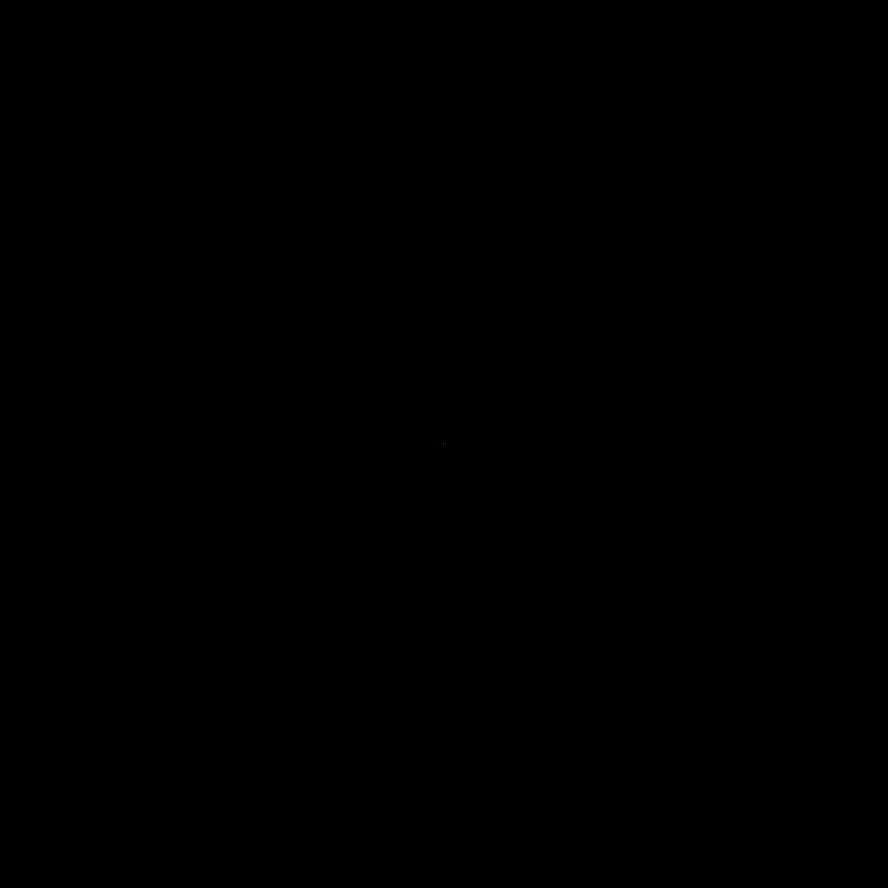

In [11]:
max_price_art = data['price'].max()

path_max_price_art= data[data['price'] >= max_price_art]['path'].iloc[0]
#path_max_price_art

path_max_price_art = path_max_price_art.replace('./dataset/','') # to return a clean path

display(Image(data=open(PATH+path_max_price_art,'rb').read(), format='gif'))





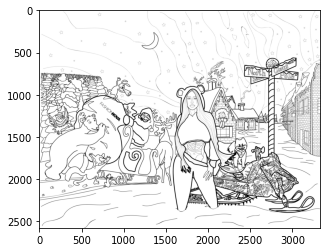

In [12]:
img_max_price = data[data['type'] == 'PHOTO' ]['price'].max()

img_max_price_path = data[data['price'] == img_max_price]['path'].iloc[0]

img_max_price_path = img_max_price_path.replace('./dataset/','')

img = plt.imread(PATH+img_max_price_path)

plt.imshow(img)

In [13]:
video_max_price = data[data['type'] == 'VIDEO' ]['price'].max()

video_max_price_path = data[data['price'] == video_max_price]['path'].iloc[0]

video_max_price_path = video_max_price_path.replace('./dataset/','')


from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=300 height=300 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

play(PATH+video_max_price_path)

Maximum tokens NFT

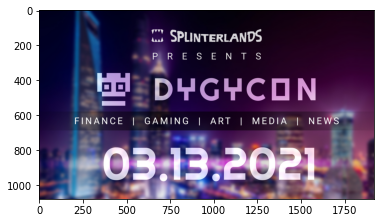

In [14]:
max_tokens_art_path = (data[data['tokens'] == max(data['tokens'].unique())]['path']).iloc[0].replace('./dataset/','')
img = plt.imread(PATH+max_tokens_art_path)
plt.imshow(img)

nomalize the price column

In [15]:

#data['price'] = data['price']/data['price'].max()   

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10]


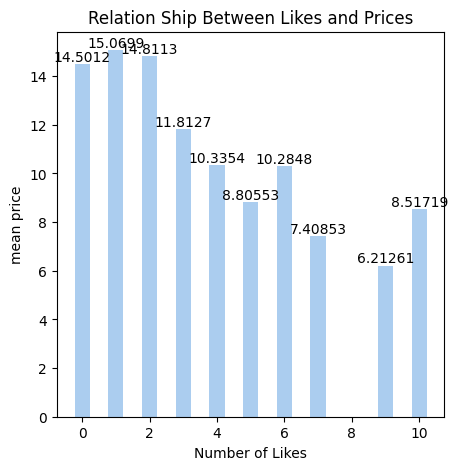

In [16]:
df3 = data.copy()
# convert likes content to str so we can count them sepreatly
df3['likes'] = df3['likes'].astype('category')
df3['likes'] = df3['likes'].apply(lambda x : str(x))

df3 = data.groupby('likes').sum()

df3['price'] = np.log(df3['price'])

likes_values = [df3.index[i] for i in range(10)]
print(likes_values)

likes_and_prices =[df3['price'].iloc[i] for i in range(10) ] 



plt.style.use('default')
plt.figure(figsize=(5,5))
p =plt.bar(likes_values,likes_and_prices,width=0.45,color='#abcdef')
#plt.ylim(0.000001,2)
#plt.ylim(0,0.002)

plt.title("Relation Ship Between Likes and Prices")

plt.bar_label(p)
plt.xlabel('Number of Likes')
plt.ylabel('mean price')
plt.show()





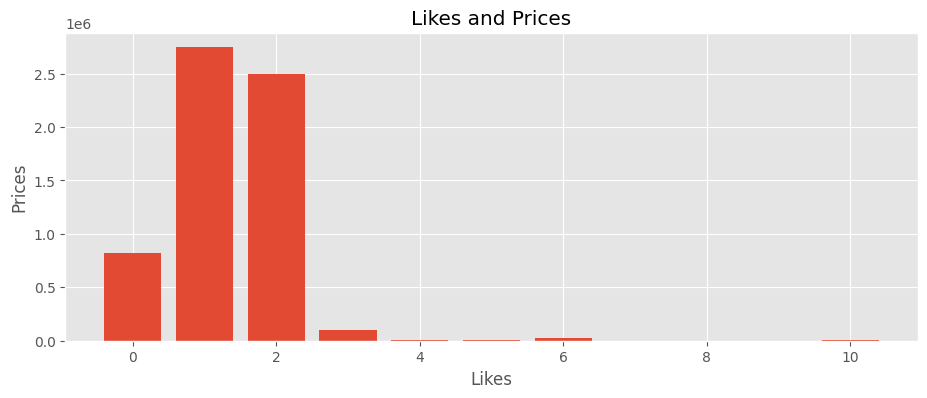

In [17]:
# SALES AS COMPARED TO EACH OTHER
price_ = data['price']
likes_ = data['likes']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(likes_,price_)
plt.title('Likes and Prices')
plt.xlabel('Likes')
plt.ylabel('Prices')
plt.show()

## Hypothesis test


### Q1- Is The average Money Collected by top 5 creators Higher than than the average of money collected by all other creators ?

**Null Hypothesis H0**: There is no relation between the money collected by top5 creators and other creators

**Alternate hypothesis H1**: Top5 creators tend to have higher collected money than otherr creators 

In [18]:
# prepare the data of top creators

top_creators = data['creator'].value_counts().head(5)

top_creators_stats = dict()
for i in range(len(top_creators)):
    top_creators_stats[top_creators.index[i]] = top_creators.values[i]
top_creators_stats

top_creators_list = []
for a, b in enumerate(top_creators_stats.keys()):
    top_creators_list.append(b)
    
print(top_creators_list)
print(len(top_creators_list))

['elenasteem', 'richardfyates', 'artxmike', 'doze', 'elgeko']
5


In [19]:
#!pip install scipy=='1.6.0' # to use stats.ttest_ind func
from scipy import stats

# select top5 creators
top5creators_df = data[data['creator'].apply(lambda x : x in top_creators_list)]['price']

othercreators_df = data[data['creator'].apply(lambda x : x not in top_creators_list)]['price']
#top5creators_df
#to make sure that this data frame contains only top5 creators
#top5creators_df['creator'].unique()
#othercreators_df['creator'].nunique()
#data['creator'].nunique() so 515(all creators) - 510(other creators) = 5 top creators

stats.ttest_ind(top5creators_df, othercreators_df,alternative='greater')

#stats.ttest_ind?


Ttest_indResult(statistic=-0.6002022361368741, pvalue=0.7257980270320944)

so as we can see the pvalue is very high so we cannot reject the null hypothesis


and thier is a relationship between the money collected and top5 creators

-------------------------------------------------------------

### Q2- Is the average Number of likes for top 5 creator  higher than the average of likes of of other creators?

**Null Hypothesis H0**: the top5 creators have high average of likes


**Alternate hypothesis H1**: top5 creators have low likes

In [20]:
top5creators_df = data[data['creator'].apply(lambda x : x in top_creators_list)]['likes']

othercreators_df = data[data['creator'].apply(lambda x : x not in top_creators_list)]['likes']

stats.ttest_ind(top5creators_df, othercreators_df,alternative='greater')


Ttest_indResult(statistic=-3.988027553805234, pvalue=0.9999661190436393)

also here the pcalue is high so we cannot reject the null hypothesis

and from Q1 the top5 creators have the most collected money

it seemes like they create alot of NFTs art with low price

so they collect the highest money and highest likes

so people love NFTs with low prices as they can buy them so they give the NFT art more likes 

as they feel they have the ability to buy it one day !!

increadible result , isn't be

### and the following graph make that sure

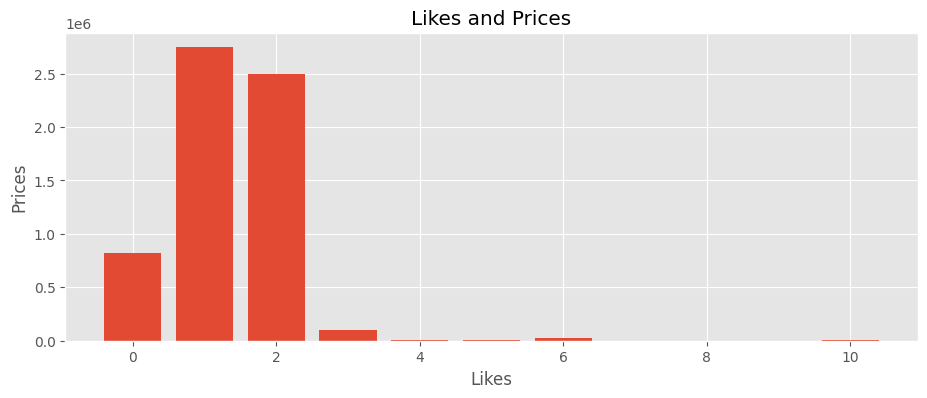

In [21]:
# SALES AS COMPARED TO EACH OTHER
price_ = data['price']
likes_ = data['likes']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(likes_,price_)
plt.title('Likes and Prices')
plt.xlabel('Likes')
plt.ylabel('Prices')
plt.show()

-------------------------------------------------------------


### Q3-  Is The Average Price of NSFW arts less than The Average Price of Non NSFW arts?

**Null Hypothesis H0**: The Price of NSFW art is less than Non NSFW art

**Alternate hypothesis H1**: The Price of NSFW is higher than Non  NSFW art

In [22]:
NSFW_art = data[data['nsfw']==True]['price']
not_NSFW_art = data[data['nsfw'] == False]['price']
stats.ttest_ind(NSFW_art, not_NSFW_art,alternative='greater')


Ttest_indResult(statistic=-0.317540125594049, pvalue=0.6245751841772851)

Since The pvalue = 0.6 > 0.05 , so we cannot reject the null hypotheis,
and the Price of NSFW is less than Non NSFW art

and this follwoing plot make sure of this hypothesis

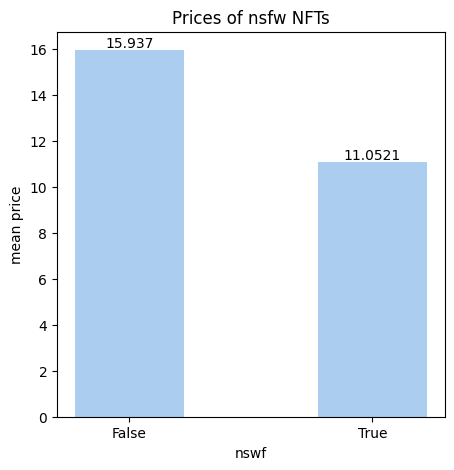

In [23]:
# show the most creators who work on nfsw art

import matplotlib.pyplot as plt
df2 = data.groupby('nsfw').sum()

df2['price'] = np.log(df2['price'])

nsfw_prices = [df2['price'][0],df2['price'][1]]


nsfw_values = ['False','True']
plt.style.use('default')
plt.figure(figsize=(5,5))
p =plt.bar(nsfw_values,nsfw_prices,width=0.45,color='#abcdef')
#plt.ylim(0.000001,2)
#plt.ylim(0,0.002)

plt.title("Prices of nsfw NFTs")
plt.bar_label(p)
plt.xlabel('nswf')
plt.ylabel('mean price')
plt.show()


*and we can see that non nsfw art has the highest price*
*and vice verca the price of NSFW art is less than the price of Non NSFW art as the null hypotheis saied*

---------------------------------
